In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


App: Application name

Category: Category to which the app belongs 

Rating: Overall user rating of the app

Reviews: Number of user reviews for the app

Size: Size of the app

Installs: Number of user downloads/installs for the app

Type: Paid or Free

Price: Price of the app

Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult

Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.

Last Updated: Date when the app was last updated on Play Store

Current Ver: Current version of the app available on Play Store

Android Ver: Minimum required Android version

 

Steps to perform:

Load the data file using pandas. 

Check for null values in the data. Get the number of null values for each column.

Drop records with nulls in any of the columns. 

Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

# Check for null values in the data. Get the number of null values for each column.

In [4]:
data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Drop records with nulls in any of the columns. 

In [5]:
new_data = data.dropna()

In [6]:
new_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [7]:
new_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
new_data["Size"].dtype

dtype('O')

In [10]:
#new_data['Size'] =new_data['Size'].astype(float)

In [11]:
import numpy as np

In [9]:
new_data=new_data[-new_data['Size'].str.contains('Var')]

In [14]:
#df.loc[:,'SizeNum'] =df.Size.str.rstrip('Mk+')
new_data.loc[:,"SizeNum"] = new_data.Size.str.rstrip("Mk+")
new_data.SizeNum=pd.to_numeric(new_data['SizeNum'])
new_data.SizeNum.dtype

dtype('float64')

In [16]:
new_data['SizeNum']=np.where(new_data.Size.str.contains('M'),new_data.SizeNum*1000, new_data.SizeNum)

In [19]:
# Size no more needed, replace it with SizeNum and drop SizeNum
new_data.Size=new_data.SizeNum
new_data.drop('SizeNum',axis=1,inplace=True)

In [20]:
new_data.Reviews = pd.to_numeric(new_data.Reviews)

In [ ]:
4.3 Installs field is currently stored as string and has values like 1,000,000+.
4.3.1 Treat 1,000,000+ as 1,000,000
[12]: df['Installs']=df.Installs.str.replace("+","")
4.3.2 remove ‘+’, ‘,’ from the field, convert it to integer
[13]: df.Installs=df.Installs.str.replace(",","")
df.Installs=pd.to_numeric(df.Installs)
df.Installs.dtype

In [24]:
new_data['Installs']=new_data.Installs.str.replace("+","")

In [26]:
new_data.Installs=new_data.Installs.str.replace(",","")
new_data.Installs=pd.to_numeric(new_data.Installs)
new_data.Installs.dtype

dtype('int64')

In [28]:
new_data.Price=new_data.Price.str.replace("$","")
new_data.Price=pd.to_numeric(new_data.Price)
new_data.Price.dtype

dtype('float64')

In [29]:
new_data=new_data[(new_data.Rating>=1) & (new_data.Rating<=5) ]

In [32]:
new_data.drop(new_data.index[new_data.Reviews>new_data.Installs],axis=0,inplace=True)
len(new_data.index)

7717

In [35]:
index_free_and_price_gt_0 = new_data.index[((new_data.Type=='Free')&(new_data.Price>0))]

In [36]:
if len(index_free_and_price_gt_0)>0:
    print("Dropping following indices:",index_free_and_price_gt_0)
    new_data.drop(index_free_and_price_gt_0,axis=0,inplace=True)
else:
    print("There is no Free Apps with price >0")

There is no Free Apps with price >0


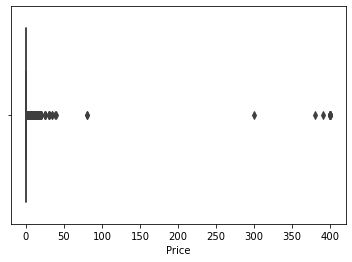

In [37]:
ax = sns.boxplot(x='Price', data=new_data)


In [ ]:
Insights: Most of Price values are less than 50 while there is some near concentration around
80. greater than 100 may be considered outliers

<AxesSubplot:xlabel='Reviews'>

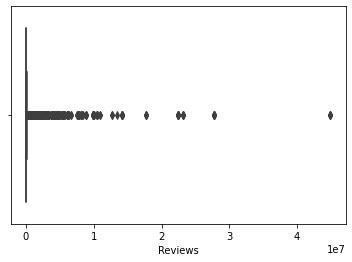

In [38]:
sns.boxplot(x='Reviews',data=new_data)

In [ ]:
Most Apps get about less than 2M review. Roughly, greater than 2M can be
considered outliers

<AxesSubplot:xlabel='Rating', ylabel='Count'>

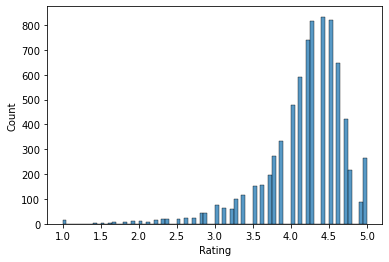

In [39]:
sns.histplot(x='Rating',data=new_data)

<AxesSubplot:xlabel='Size', ylabel='Count'>

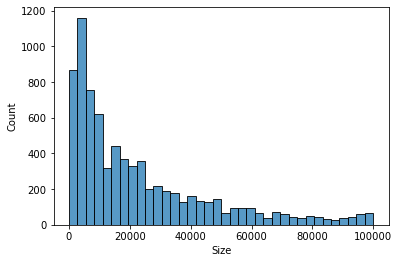

In [41]:
sns.histplot(x='Size',data=new_data)

In [42]:
new_data[new_data.Price>=200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [43]:
new_data.drop(new_data.index[(new_data.Price>=200)], inplace=True)
len(new_data.index)

7702

In [44]:
new_data.drop(new_data.index[(new_data.Reviews>=2000000)], inplace=True)
len(new_data.index)

7483

<AxesSubplot:xlabel='Installs', ylabel='count'>

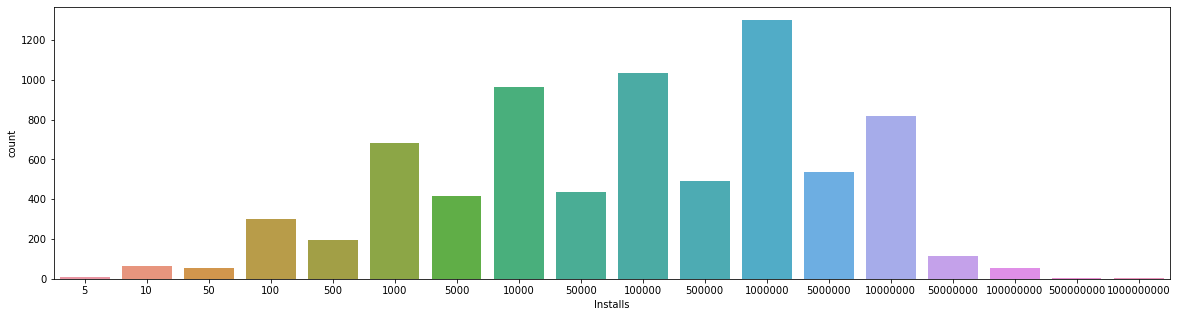

In [51]:
plt.figure(figsize=(20,5))
sns.countplot(x='Installs',data=new_data)

In [46]:
new_data["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7483, dtype: int64

<AxesSubplot:xlabel='Installs'>

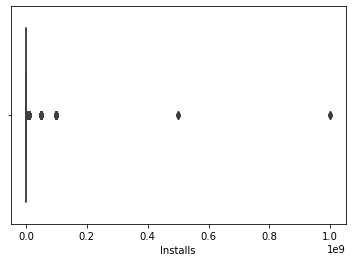

In [53]:
sns.boxplot(x='Installs',data=new_data)

In [54]:
install_10_perc=np.percentile(new_data.Installs, 10)
install_10_perc

1000.0

In [55]:
install_25_perc=np.percentile(new_data.Installs, 25)
install_25_perc

10000.0

In [ ]:
 10, 25, 50, 70, 90, 95, 99

In [56]:
install_50_perc=np.percentile(new_data.Installs, 50)
install_50_perc

100000.0

In [57]:
install_99_perc=np.percentile(new_data.Installs, 99)
install_99_perc

50000000.0

In [58]:
print("As result, ",len(new_data[new_data.Installs >= install_99_perc])," will be dropped")

As result,  176  will be dropped


In [59]:
new_data.drop(new_data.index[new_data.Installs >= install_99_perc],inplace=True)
len(new_data.index)

7307

In [71]:
new_data["Reviews"].dtype

dtype('int64')

In [60]:
inp1=new_data.copy()
inp1.Reviews=inp1.Reviews.apply(np.log1p)

In [65]:
inp1.Installs=inp1.Installs.apply(np.log1p)
inp1.drop(columns=['App','Last Updated','Current Ver','Android Ver'],inplace=True,axis=1)

In [66]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [ ]:
Dummy variable 

In [67]:
inp2= pd.get_dummies(inp1)

In [68]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,19000.0,1.200992,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,14000.0,1.294113,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,8700.0,1.334686,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,2800.0,1.260380,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,5600.0,1.244090,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
set(inp2.columns)

{'Category_ART_AND_DESIGN',
 'Category_AUTO_AND_VEHICLES',
 'Category_BEAUTY',
 'Category_BOOKS_AND_REFERENCE',
 'Category_BUSINESS',
 'Category_COMICS',
 'Category_COMMUNICATION',
 'Category_DATING',
 'Category_EDUCATION',
 'Category_ENTERTAINMENT',
 'Category_EVENTS',
 'Category_FAMILY',
 'Category_FINANCE',
 'Category_FOOD_AND_DRINK',
 'Category_GAME',
 'Category_HEALTH_AND_FITNESS',
 'Category_HOUSE_AND_HOME',
 'Category_LIBRARIES_AND_DEMO',
 'Category_LIFESTYLE',
 'Category_MAPS_AND_NAVIGATION',
 'Category_MEDICAL',
 'Category_NEWS_AND_MAGAZINES',
 'Category_PARENTING',
 'Category_PERSONALIZATION',
 'Category_PHOTOGRAPHY',
 'Category_PRODUCTIVITY',
 'Category_SHOPPING',
 'Category_SOCIAL',
 'Category_SPORTS',
 'Category_TOOLS',
 'Category_TRAVEL_AND_LOCAL',
 'Category_VIDEO_PLAYERS',
 'Category_WEATHER',
 'Content Rating_Adults only 18+',
 'Content Rating_Everyone',
 'Content Rating_Everyone 10+',
 'Content Rating_Mature 17+',
 'Content Rating_Teen',
 'Content Rating_Unrated',
 'G

In [73]:
data = inp2.drop(columns='Rating')
data.shape
target = pd.DataFrame(inp2.Rating)
target.shape



(7307, 1)

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=3)
print("x_train shape is ", x_train.shape)
print("y_train shape is ", y_train.shape)
print("x_test shape is ", x_test.shape)
print("y_test shape is ", y_test.shape)

x_train shape is  (5114, 157)
y_train shape is  (5114, 1)
x_test shape is  (2193, 157)
y_test shape is  (2193, 1)


In [77]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [79]:
from sklearn.metrics import r2_score
train_pred=model.predict(x_train)
print("R2 value of the model(by train) is ", r2_score(y_train, train_pred))



R2 value of the model(by train) is  0.1481282222800514


In [80]:
#Make predictions on test set and report R2.
test_pred=model.predict(x_test)
print("R2 value of the model(by test) is ", r2_score(y_test, test_pred))

R2 value of the model(by test) is  0.14476458290993366
